<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [ ]:
# !pip install pandas
# !pip install matplotlib

Import pandas module


In [1]:
import pandas as pd

Import matplotlib


In [2]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [ ]:
# Load the dataset directly from the URL
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
# df = pd.read_csv(file_path)

# # Display the first few rows
# print(df.head())

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [3]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df = pd.read_csv('1_survey_data_with_duplicate.csv')

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [4]:
## Write your code here
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

duplicates = df[df.duplicated()]
print("First few duplicate rows:")
duplicates.head()

Number of duplicate rows: 20
First few duplicate rows:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.

In [5]:
## Write your code here
# Find duplicates based on the subset of columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

duplicated_mask = df.duplicated(subset=subset_cols, keep=False)
duplicates_subset = df[duplicated_mask]

grouped = duplicates_subset.groupby(subset_cols)

identical_columns_count  = {}

for group_values, group_df in grouped:
    nunique_per_col = group_df.nunique()

    identical_cols = nunique_per_col[nunique_per_col == 1].index.tolist()

    for col in identical_cols:
        if col in identical_columns_count:
            identical_columns_count[col] += 1
        else:
            identical_columns_count[col] = 1

print("Columns frequently identical within duplicate groups based on subset:")
for col, count in sorted(identical_columns_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: identical in {count} groups")

Columns frequently identical within duplicate groups based on subset:
MainBranch: identical in 319 groups
Employment: identical in 319 groups
RemoteWork: identical in 319 groups
Check: identical in 319 groups
ICorPM: identical in 97 groups
AIThreat: identical in 88 groups
SOAccount: identical in 85 groups
AINextLess integrated: identical in 76 groups
AISelect: identical in 75 groups
SurveyLength: identical in 75 groups
AINextMuch more integrated: identical in 74 groups
AINextNo change: identical in 67 groups
SOPartFreq: identical in 67 groups
AIToolNot interested in Using: identical in 67 groups
AIComplex: identical in 64 groups
PlatformWantToWorkWith: identical in 61 groups
MiscTechAdmired: identical in 61 groups
EmbeddedWantToWorkWith: identical in 60 groups
PlatformAdmired: identical in 59 groups
AISent: identical in 59 groups
EmbeddedAdmired: identical in 58 groups
ProfessionalCloud: identical in 58 groups
ProfessionalQuestion: identical in 58 groups
Frequency_1: identical in 58 gr

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


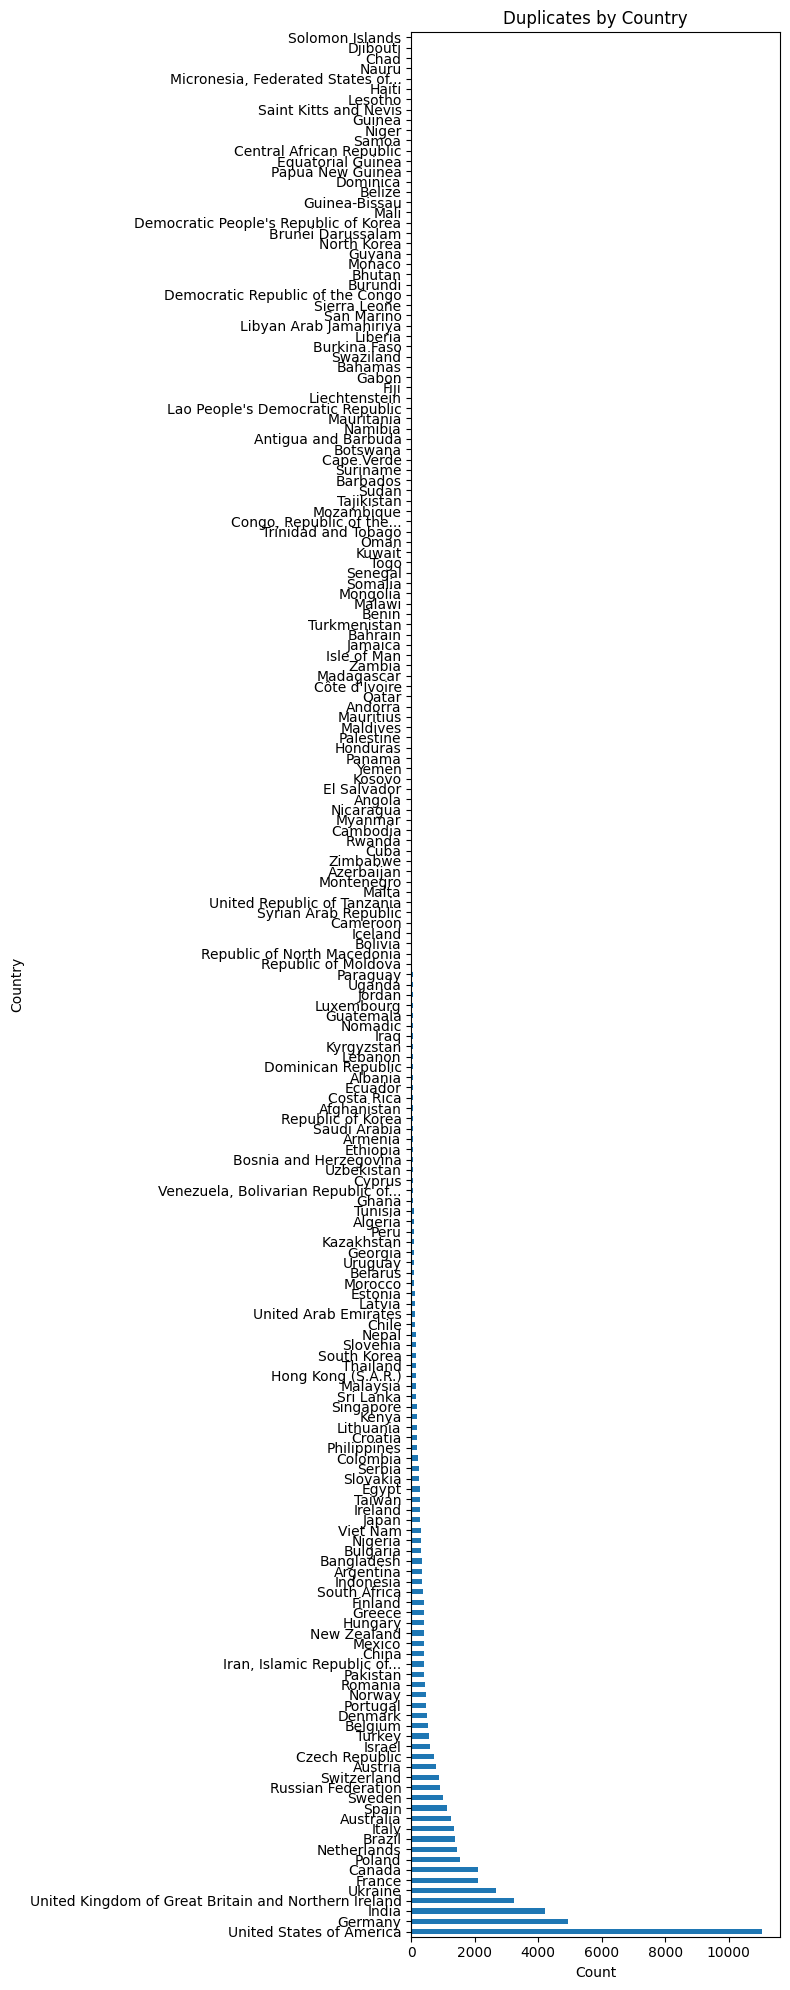

In [12]:
## Write your code here

# Plot by Countries
dupes = df[df.duplicated(subset=subset_cols, keep=False)]
plt.figure(figsize=(8, 20))  # узкий, но высокий график
dupes['Country'].value_counts().plot(kind='barh')  # horizontal
plt.title('Duplicates by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

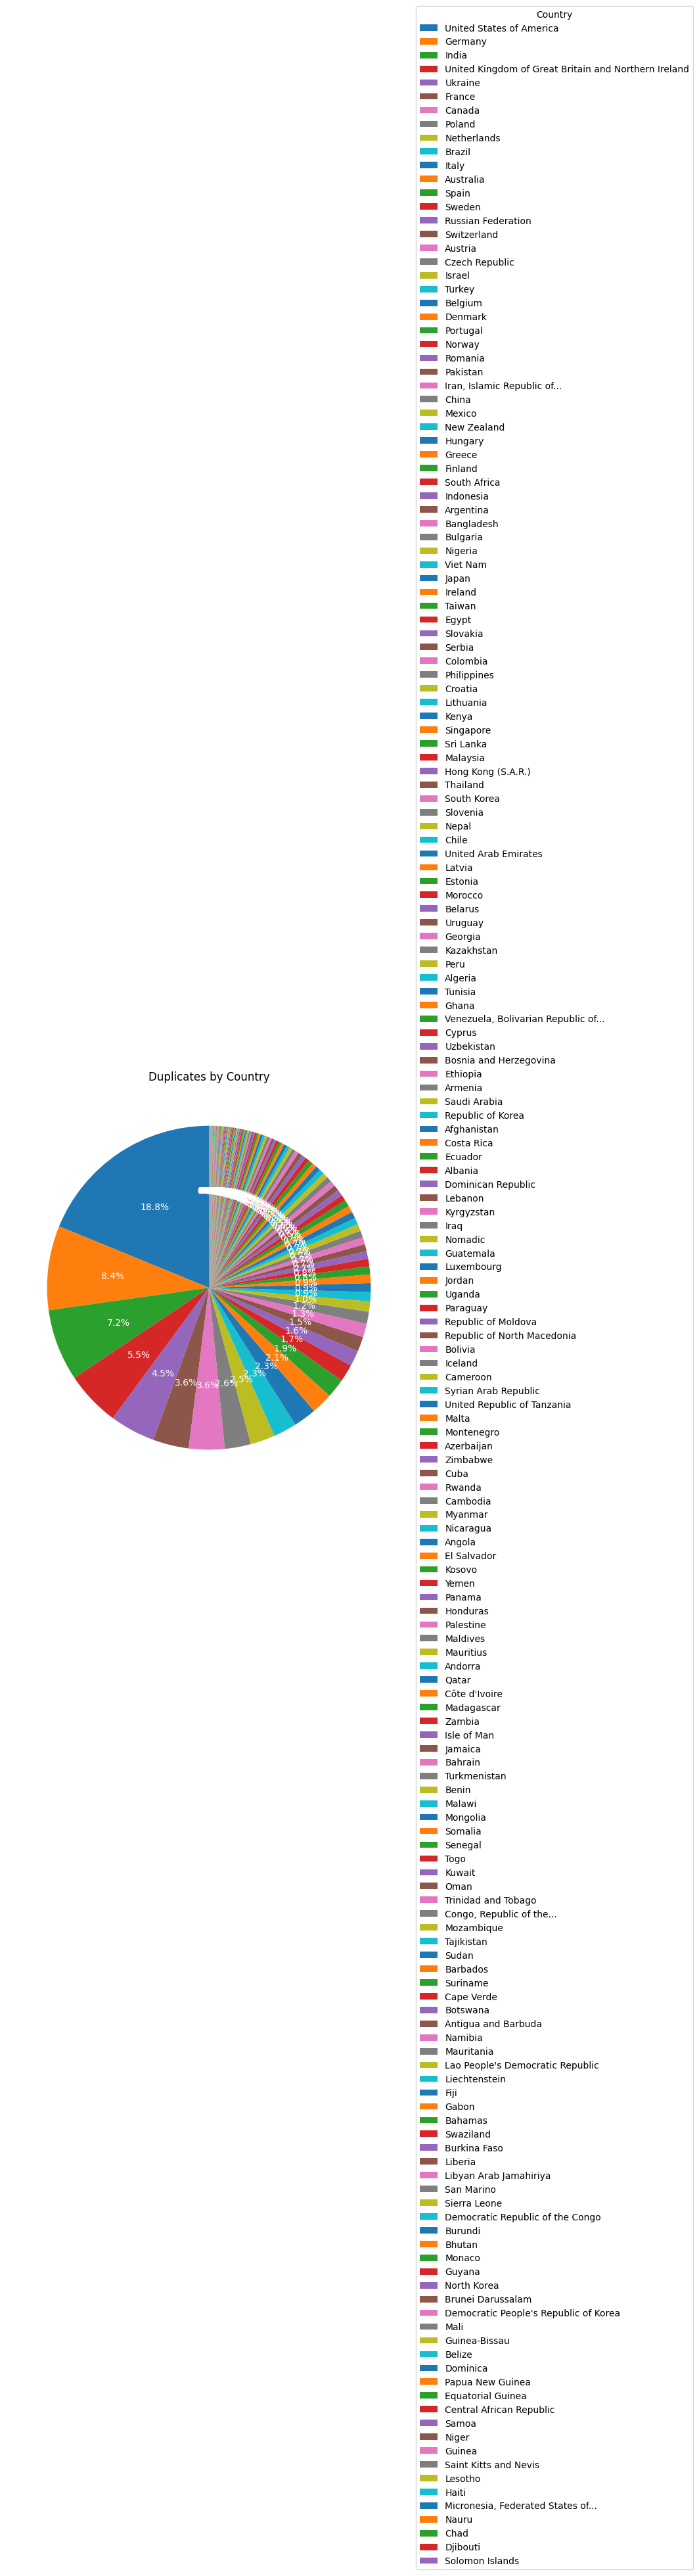

In [16]:
# Plot by Employment
counts = dupes['Country'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color': 'w'}  # убираем цветовой конфликт
)

# Легенда сбоку
plt.legend(
    wedges,
    counts.index,
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Duplicates by Country')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [15]:
## Write your code here
critical_columns = ['MainBranch', 'Employment', 'RemoteWork']

df_unique = df.drop_duplicates(subset=critical_columns, keep='first')

print(df.shape)
print(df_unique.shape)

(65457, 114)
(561, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
